## Reading the file into a string

In [1]:
file_original = open("output.txt", "r+")
text_file = file_original.read()
file_original.close()

In [2]:
'''Splitting the lines and using linewise'''
values = []

for ind, line in enumerate(text_file.split('\n')):
    ''' Checking if the output is from the Scheduler, else ignore '''
    split_line = line.split(' ')
    if split_line[0] != "MLFQ:":
        continue
    ''' [2] is process number, [5] is new queue and [-1] is ticks '''
    values.append([int(split_line[2]), int(split_line[5]), int(split_line[-1])])

In [3]:
process_wise = []

for i in range(60):
    process_wise.append([i, []])
    
for row in values:
    process_wise[row[0]][1].append([row[2], row[1]])

for ind, process in enumerate(process_wise):
    if len(process[1]) == 0:
        process_wise.pop(ind)

In [5]:
from matplotlib import pyplot as plt 

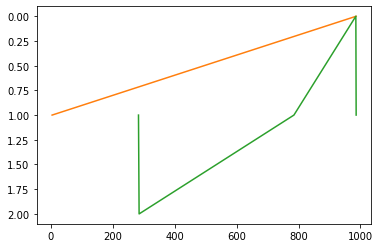

In [6]:
for process in process_wise:
    x_coord = [row[0] for row in process[1]]
    y_coord = [row[1] for row in process[1]]
    plt.plot(x_coord, y_coord)
    plt.gca().invert_yaxis()

In [7]:
import time

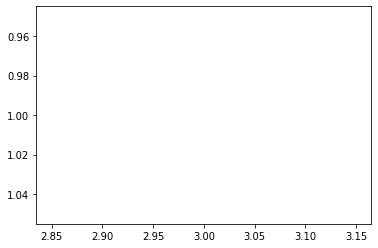

1


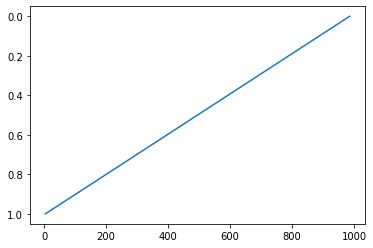

2


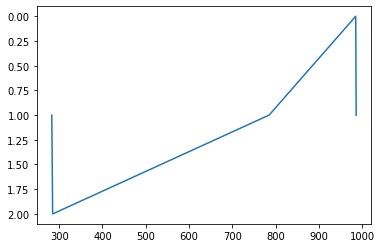

3


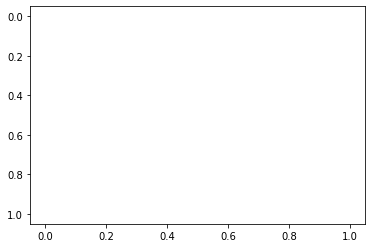

5


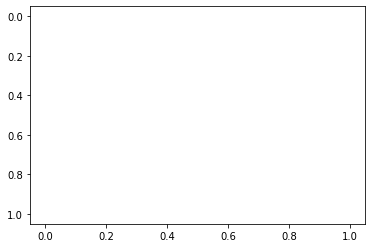

7


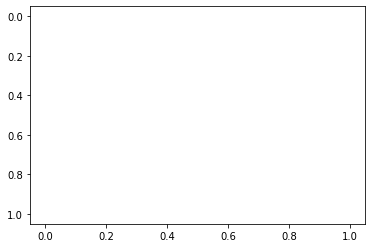

9


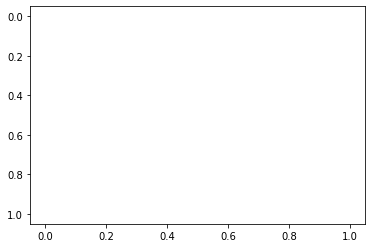

11


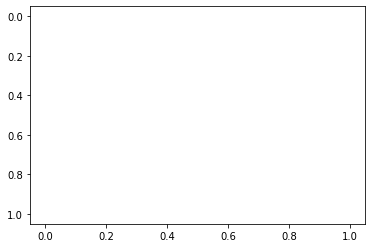

13


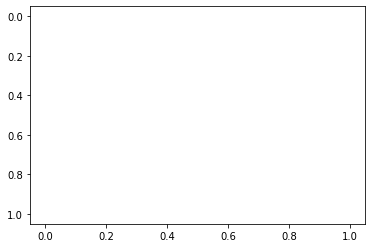

15


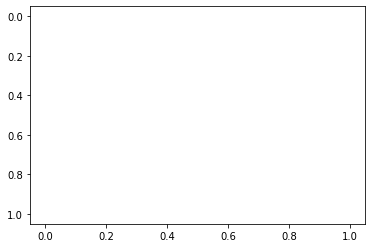

17


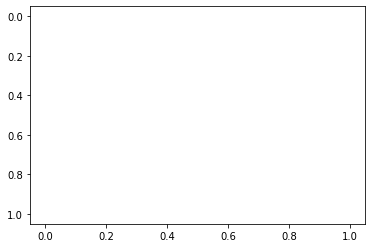

19


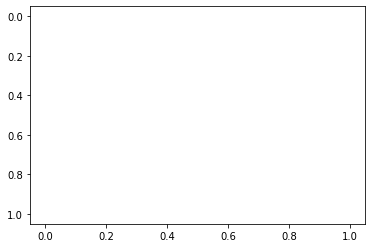

21


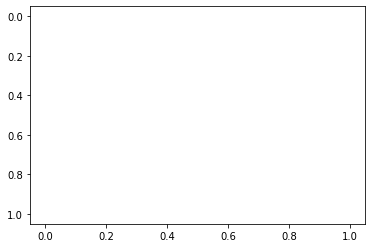

23


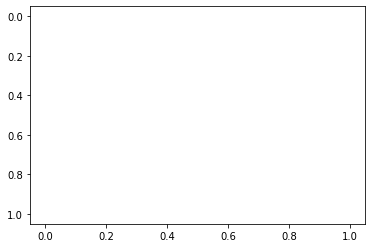

25


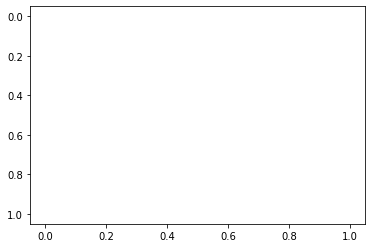

27


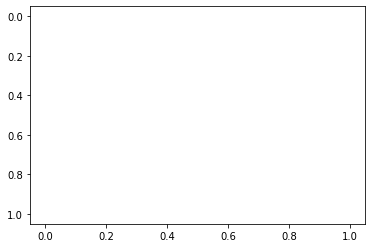

29


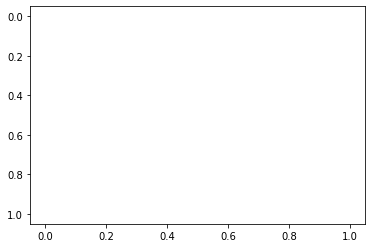

31


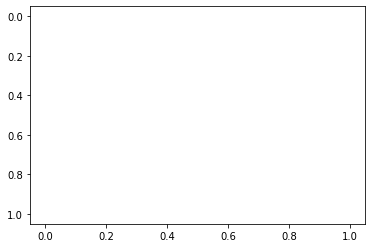

33


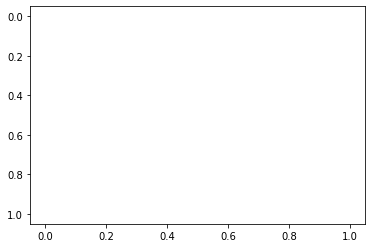

35


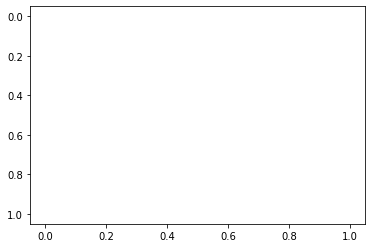

37


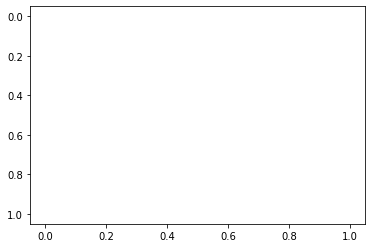

39


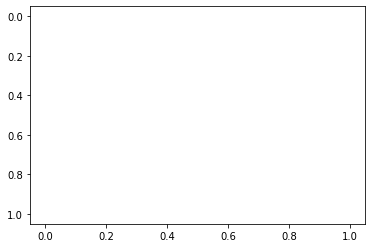

41


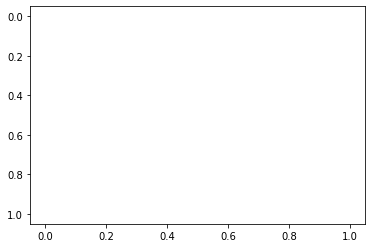

43


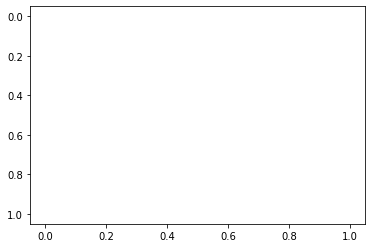

45


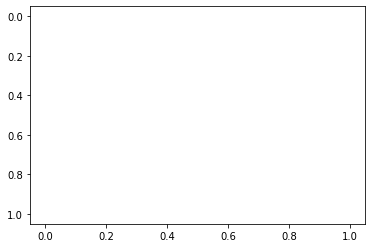

47


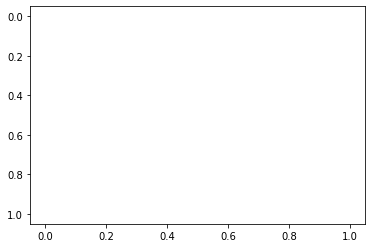

49


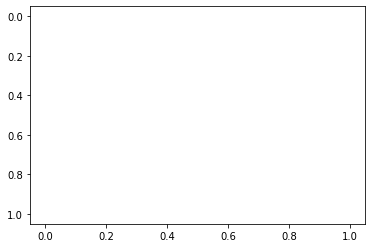

51


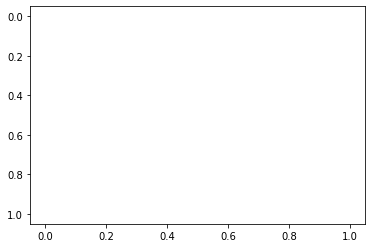

53


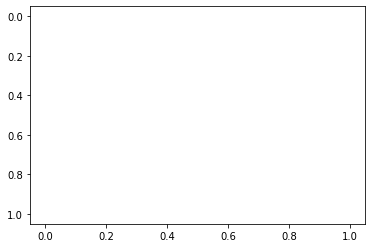

55


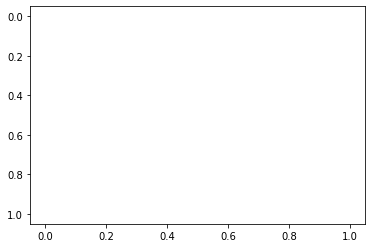

57


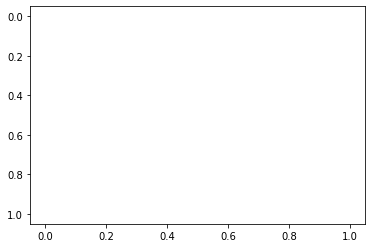

59


In [8]:
for process in process_wise:
    x_coord = [row[0] for row in process[1]]
    y_coord = [row[1] for row in process[1]]
    plt.plot(x_coord, y_coord)
    plt.gca().invert_yaxis()
    plt.show()
    print(process[0])
    time.sleep(1)

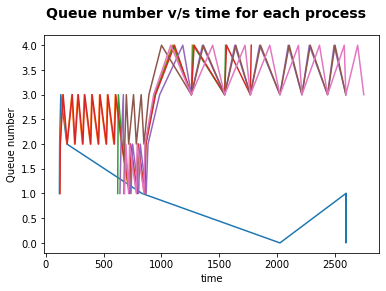

In [52]:
# Handpicking a few of the processes for better representation

fig = plt.figure()
fig.suptitle('Queue number v/s time for each process', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

ax.set_xlabel('time')
ax.set_ylabel('Queue number')
required_processes = [3, 4, 6, 8, 26, 30, 50]

for ind, process in enumerate(process_wise):
    if process[0] not in required_processes:
        continue
    x_coord = [row[0] for row in process[1]]
    y_coord = [row[1] for row in process[1]]
    plt.plot(x_coord, y_coord)

plt.savefig("MLFQ.png")